# POLI 175 - Lecture 25

## Deep Learning III

# Deep Learning

## Deep Learning

- Let us get started by fitting a Neural Networking to predict votes in the Chile Dataset.

- Remember that the Chile dataset the answers were:
    + Undecided
    + Abstain
    + Yes
    + No
    
- Let us see if we can improve upon the results from the multinomial support vector machine.

In [1]:
# Some Keras
# To install it in mykernel
# source mykernel/bin/activate
# pip install tensorflow
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.utils import to_categorical

2023-03-13 22:44:38.351325: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-03-13 22:44:39.302829: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2023-03-13 22:44:39.302899: I tensorflow/compiler/xla/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.
2023-03-13 22:44:47.429134: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer.so.7'; dlerror: libnvinfer.so.7: cannot open shared object file: No such file or directory
2023-

In [2]:
## Loading the relevant packages
import pandas as pd
import numpy as np

# Plotting things:
import seaborn as sns
import matplotlib.pyplot as plt

# Some statsmodels to deal with GAMs
import statsmodels.api as sm
from statsmodels.gam.api import GLMGam, BSplines

In [3]:
# Scikit Learn
from sklearn.linear_model import LogisticRegression, LinearRegression, Ridge, Lasso
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis, QuadraticDiscriminantAnalysis
from sklearn.metrics import confusion_matrix, classification_report, precision_score, get_scorer_names, mean_squared_error, r2_score, mean_squared_error, roc_auc_score, ConfusionMatrixDisplay, accuracy_score
from sklearn.model_selection import train_test_split, LeaveOneOut, cross_val_score, KFold, GridSearchCV
from sklearn.inspection import DecisionBoundaryDisplay
from sklearn.tree import DecisionTreeRegressor, DecisionTreeClassifier, plot_tree, export_text
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler, PolynomialFeatures, SplineTransformer
from sklearn.feature_selection import SequentialFeatureSelector
from sklearn.ensemble import VotingClassifier, BaggingRegressor, BaggingClassifier, RandomForestRegressor, RandomForestClassifier, AdaBoostClassifier, AdaBoostRegressor, GradientBoostingRegressor, GradientBoostingClassifier
from sklearn.svm import LinearSVC, SVC

In [4]:
## Loading Chile data
chile = pd.read_csv('https://raw.githubusercontent.com/umbertomig/POLI175public/main/data/chilesurvey.csv')
chile_clean = chile.dropna()
chile_clean = chile_clean[chile_clean['vote'].isin(['Y', 'N'])]
chile_clean['vote'] = np.where(chile_clean['vote'] == 'Y', 1, 0)
chile_clean['logincome'] = np.log(chile_clean['income'])
chile_clean['logpop'] = np.log(chile_clean['population'])
dummies = pd.get_dummies(chile_clean['sex'], prefix = 'sex', drop_first = True)
chile_clean = pd.concat([chile_clean, dummies], axis=1)
dummies = pd.get_dummies(chile_clean['region'], prefix = 'region', drop_first = True)
chile_clean = pd.concat([chile_clean, dummies], axis=1)
dummies = pd.get_dummies(chile_clean['education'], prefix = 'education', drop_first = True)
chile_clean = pd.concat([chile_clean, dummies], axis=1)
chile_clean.head()

,region,population,sex,age,education,income,statusquo,vote,logincome,logpop,sex_M,region_M,region_N,region_S,region_SA,education_PS,education_S
0,N,175000,M,65.0,P,35000.0,1.00820,1,10.463103,12.072541,1,0,1,0,0,0,0
1,N,175000,M,29.0,PS,7500.0,-1.29617,0,8.922658,12.072541,1,0,1,0,0,1,0
2,N,175000,F,38.0,P,15000.0,1.23072,1,9.615805,12.072541,0,0,1,0,0,0,0
3,N,175000,F,49.0,P,35000.0,-1.03163,0,10.463103,12.072541,0,0,1,0,0,0,0
4,N,175000,F,23.0,S,35000.0,-1.10496,0,10.463103,12.072541,0,0,1,0,0,0,1


In [5]:
## Loading Chile data
chile_clean2 = chile.dropna()
chile_clean2['logincome'] = np.log(chile_clean2['income'])
chile_clean2['logpop'] = np.log(chile_clean2['population'])
dummies = pd.get_dummies(chile_clean2['sex'], prefix = 'sex', drop_first = True)
chile_clean2 = pd.concat([chile_clean2, dummies], axis=1)
dummies = pd.get_dummies(chile_clean2['region'], prefix = 'region', drop_first = True)
chile_clean2 = pd.concat([chile_clean2, dummies], axis=1)
dummies = pd.get_dummies(chile_clean2['education'], prefix = 'education', drop_first = True)
chile_clean2 = pd.concat([chile_clean2, dummies], axis=1)
print(chile_clean2.vote.value_counts())

N    867
Y    836
U    551
A    177
Name: vote, dtype: int64


/tmp/ipykernel_2205/1549749199.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  chile_clean2['logincome'] = np.log(chile_clean2['income'])
/tmp/ipykernel_2205/1549749199.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  chile_clean2['logpop'] = np.log(chile_clean2['population'])


In [6]:
# Initialize the model
model = Sequential()

# Getting the 11 variables and feeding them into 22 neurons
model.add(Dense(22, input_shape=(11,), activation='sigmoid'))

# Adding 22 extra neurons
model.add(Dense(22, activation='relu'))

# Adding a second layer with 22 extra neurons
model.add(Dense(22, activation='sigmoid'))

# Adding a third layer with 22 extra neurons
model.add(Dense(22, activation='relu'))

# Spitting out the predictions (note: softmax, the best when multinomial problem)
model.add(Dense(4, activation='softmax'))

# Compile your model (note: categorical_crossentropy)
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Display a summary of your model
model.summary()

2023-03-13 22:45:04.703067: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory
2023-03-13 22:45:04.703145: W tensorflow/compiler/xla/stream_executor/cuda/cuda_driver.cc:265] failed call to cuInit: UNKNOWN ERROR (303)
2023-03-13 22:45:04.703198: I tensorflow/compiler/xla/stream_executor/cuda/cuda_diagnostics.cc:163] no NVIDIA GPU device is present: /dev/nvidia0 does not exist
2023-03-13 22:45:04.706078: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 22)                264       
                                                                 
 dense_1 (Dense)             (None, 22)                506       
                                                                 
 dense_2 (Dense)             (None, 22)                506       
                                                                 
 dense_3 (Dense)             (None, 22)                506       
                                                                 
 dense_4 (Dense)             (None, 4)                 92        
                                                                 
Total params: 1,874
Trainable params: 1,874
Non-trainable params: 0
_________________________________________________________________


In [7]:
## A bit of pre-processing in the voting variable
y2 = chile_clean2['vote']
y2 = pd.Categorical(y2)
cats = y2.categories
y2 = y2.codes
y2 = to_categorical(y2)
X2 = chile_clean2[['age', 'logincome', 'statusquo', 'logpop', 'sex_M', 
                  'region_M', 'region_N', 'region_S', 'region_SA', 'education_PS', 'education_S']]
X2_train, X2_test, y2_train, y2_test = train_test_split(X2, y2, test_size = 0.3, random_state = 12345)
chile_clean2.head()

,region,population,sex,age,education,income,statusquo,vote,logincome,logpop,sex_M,region_M,region_N,region_S,region_SA,education_PS,education_S
0,N,175000,M,65.0,P,35000.0,1.00820,Y,10.463103,12.072541,1,0,1,0,0,0,0
1,N,175000,M,29.0,PS,7500.0,-1.29617,N,8.922658,12.072541,1,0,1,0,0,1,0
2,N,175000,F,38.0,P,15000.0,1.23072,Y,9.615805,12.072541,0,0,1,0,0,0,0
3,N,175000,F,49.0,P,35000.0,-1.03163,N,10.463103,12.072541,0,0,1,0,0,0,0
4,N,175000,F,23.0,S,35000.0,-1.10496,N,10.463103,12.072541,0,0,1,0,0,0,1


In [8]:
## Fitting 20 epochs
model.fit(X2_train, y2_train, epochs = 20, verbose = 0)
preds = model.predict(X2_test)
y2_test2 = [np.argmax(pred) for pred in y2_test]
y2_pred = np.array([np.argmax(pred) for pred in preds])

## Confusion Matrix
confusion_matrix(y2_test2, y2_pred)

23/23 [==============================] - 1s 5ms/step


array([[  0,  30,  22,  14],
       [  0, 221,  16,  12],
       [  0,  56,  54,  67],
       [  0,  15,  26, 197]])

In [9]:
## Are we overfitting? We can save the history and check for that!
# Initialize the model
model = Sequential()

# Getting the 11 variables and feeding them into 22 neurons
model.add(Dense(22, input_shape=(11,), activation='sigmoid'))

# Adding 22 extra neurons
model.add(Dense(22, activation='relu'))

# Adding a second layer with 22 extra neurons
model.add(Dense(22, activation='sigmoid'))

# Adding a third layer with 22 extra neurons
model.add(Dense(22, activation='relu'))

# Spitting out the predictions (note: softmax, the best when multinomial problem)
model.add(Dense(4, activation='softmax'))

# Compile your model (note: categorical_crossentropy)
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Display a summary of your model
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_5 (Dense)             (None, 22)                264       
                                                                 
 dense_6 (Dense)             (None, 22)                506       
                                                                 
 dense_7 (Dense)             (None, 22)                506       
                                                                 
 dense_8 (Dense)             (None, 22)                506       
                                                                 
 dense_9 (Dense)             (None, 4)                 92        
                                                                 
Total params: 1,874
Trainable params: 1,874
Non-trainable params: 0
_________________________________________________________________


In [10]:
## Are we overfitting? We can save the history and check for that!
h_callback = model.fit(X2_train, y2_train, epochs = 100, validation_data=(X2_test, y2_test), verbose = 0)

# prep to confusion matrix
preds = model.predict(X2_test)
y2_test2 = [np.argmax(pred) for pred in y2_test]
y2_pred = np.array([np.argmax(pred) for pred in preds])

## Confusion Matrix
confusion_matrix(y2_test2, y2_pred)

23/23 [==============================] - 0s 6ms/step


array([[  0,  24,  19,  23],
       [  0, 206,  27,  16],
       [  0,  46,  63,  68],
       [  0,  13,  28, 197]])

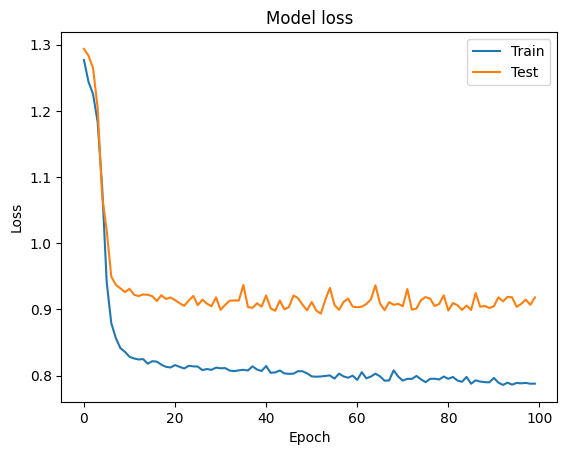

In [11]:
# Plot train vs test loss during training
plt.figure()
plt.plot(h_callback.history['loss'])
plt.plot(h_callback.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper right')
plt.show()

## Deep Learning

### Convolutional Neural Net

- It was why NN rebounded in the 2010s. It is excellent for classifying images.

- It benefitted from the ever-growing training datasets that were already human-classified.

## Deep Learning

### Convolutional Neural Net

- It mirrors how the human brain does image classification:

![cnn1](https://raw.githubusercontent.com/umbertomig/POLI175public/main/img/cnn1.png)

## Deep Learning

### Convolutional Neural Net

- Convolutional layers:
    + Every image can be decomposed into many layers
    + Here is an example:
    
![cnn2](https://raw.githubusercontent.com/umbertomig/POLI175public/main/img/cnn2.png)

## Deep Learning

### Convolutional Neural Net

- And this has an interesting structure when looking into the *linear algebra* of the problem.

- Consider that the original image is:

$$
\text{Image} = \begin{bmatrix}
a & b & c\\
d & e & f\\
h & g & i\\
j & k & l
\end{bmatrix}
$$

## Deep Learning

### Convolutional Neural Net

- Now, consider a convolution filter:
$$
\text{Convolution Filter}= \begin{bmatrix}
\alpha & \beta \\
\gamma & \delta
\end{bmatrix}
$$

## Deep Learning

### Convolutional Neural Net

- Applying the filter to the image, we get the *convolved image*:

$$
\text{Convolved Image}= \begin{bmatrix}
a\alpha + b\beta + d\gamma + e\delta & b\alpha + c\beta + e\gamma + f\delta \\
d\alpha + e\beta + g\gamma + h\delta & e\alpha + f\beta + h\gamma + i\delta \\
g\alpha + h\beta + j\gamma + k\delta & h\alpha + i\beta + k\gamma + l\delta
\end{bmatrix}
$$

## Deep Learning

### Convolutional Neural Net

- Back to the cool example: 
    + This was generates using 192 x 179 pixels image, and applying two 15 x 15 convolution filters.
    
![cnn2](https://raw.githubusercontent.com/umbertomig/POLI175public/main/img/cnn2.png)

## Deep Learning

### Convolutional Neural Net

- At the end of the process, we must return to the image.

- To do so, we pool the layers back together.

- The process increases size (convolution filters), then decreases (pooling), then increases again, and so on.

- This is repeated until there are very few pixels in each layer. Then we *flatten* the image back to one pixel.

## Deep Learning

### Convolutional Neural Net

![cnn3](https://raw.githubusercontent.com/umbertomig/POLI175public/main/img/cnn3.png)

## Deep Learning

### Convolutional Neural Net

- Applied several times to the same image: You are augmenting your data space (generating features!)
    
![cnn4](https://raw.githubusercontent.com/umbertomig/POLI175public/main/img/cnn4.png)

- Next class we will talk about how to fit them in `keras`, and also how to fit `Recurrent NN`s.

# Questions?

# See you next class
